<a href="https://colab.research.google.com/github/x3O8/Gradient_Descent_Optimization/blob/main/adam_nadam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Adam...
Adam Epoch 0: Loss = 47.3622, Accuracy = 0.6264
Adam Epoch 1: Loss = 46.5008, Accuracy = 0.6374
Adam Epoch 2: Loss = 45.8919, Accuracy = 0.6418
Adam Epoch 3: Loss = 45.4237, Accuracy = 0.6505
Adam Epoch 4: Loss = 45.0396, Accuracy = 0.6527
Adam Epoch 5: Loss = 44.7098, Accuracy = 0.6527
Adam Epoch 6: Loss = 44.4179, Accuracy = 0.6527
Adam Epoch 7: Loss = 44.1536, Accuracy = 0.6549
Adam Epoch 8: Loss = 43.9101, Accuracy = 0.6637
Adam Epoch 9: Loss = 43.6831, Accuracy = 0.6703
Adam Epoch 10: Loss = 43.4692, Accuracy = 0.6747
Adam Epoch 11: Loss = 43.2660, Accuracy = 0.6747
Adam Epoch 12: Loss = 43.0716, Accuracy = 0.6791
Adam Epoch 13: Loss = 42.8847, Accuracy = 0.6835
Adam Epoch 14: Loss = 42.7042, Accuracy = 0.6835
Adam Epoch 15: Loss = 42.5290, Accuracy = 0.6879
Adam Epoch 16: Loss = 42.3586, Accuracy = 0.6901
Adam Epoch 17: Loss = 42.1923, Accuracy = 0.6901
Adam Epoch 18: Loss = 42.0296, Accuracy = 0.6901
Adam Epoch 19: Loss = 41.8700, Accuracy = 0.6945
Adam Epoch 20:

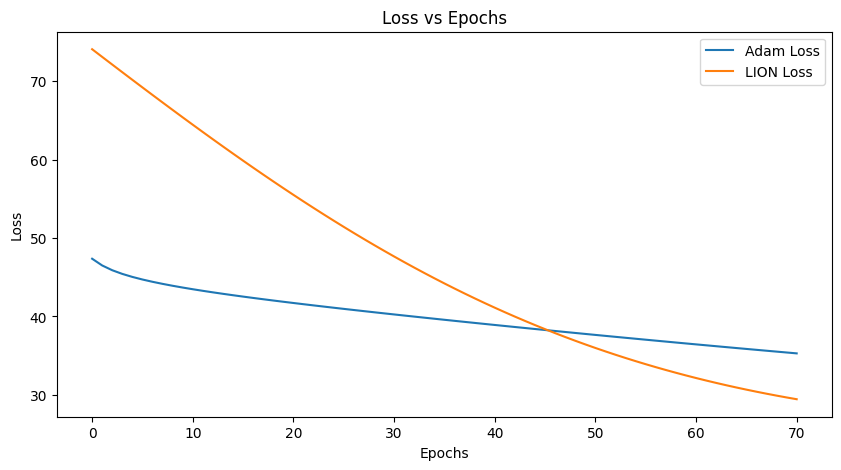

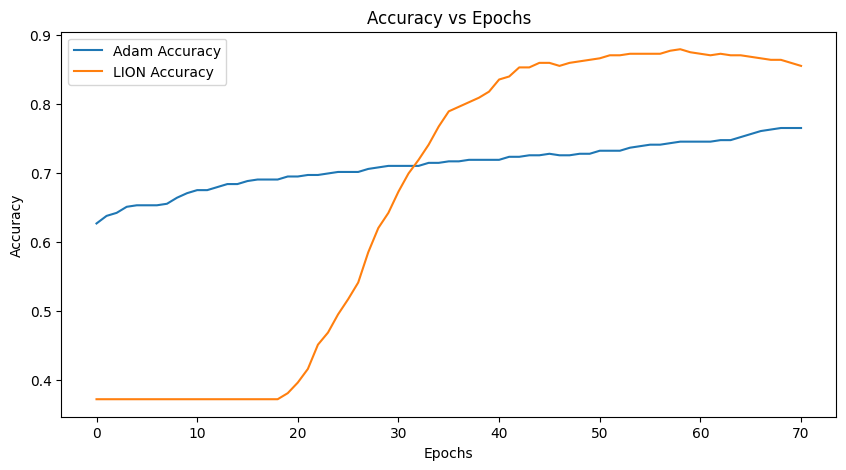

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import math

# Helper Functions from User Query
def f(x, w, b):
    '''Sigmoid Function'''
    f = 1 / (1 + np.exp(-(w * x + b)))
    return f

def mse(x, y, w, b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5 * (y[i] - f(x[i], w, b)) ** 2
    return L

def cross_entropy(x, y, w, b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i] * np.log(f(x[i], w, b) + 1e-15))
    return L

def grad_w_mse(x, y, w, b):
    fx = f(x, w, b)
    dw = (fx - y) * fx * (1 - fx) * x
    return dw

def grad_b_mse(x, y, w, b):
    fx = f(x, w, b)
    db = (fx - y) * fx * (1 - fx)
    return db

def grad_w_cross(x, y, w, b):
    fx = f(x, w, b)
    dw = (-y) * (1 - fx) * x
    return dw

def grad_b_cross(x, y, w, b):
    fx = f(x, w, b)
    db = (-y) * (1 - fx)
    return db

def predict(x, w, b):
    return (f(x, w, b) >= 0.5).astype(int)

def accuracy(x, y, w, b):
    return np.mean(predict(x, w, b) == y)

# Adam Optimizer
def Adam(x, y, epochs, batch_size, loss, lr=0.001):
    w = np.random.randn()
    b = np.random.randn()
    epsilon = 1e-8
    beta1 = 0.9
    beta2 = 0.999
    momentum_w, momentum_b = 0, 0
    update_w, update_b = 0, 0
    l_list = []
    acc_list = []
    ep = [i for i in range(epochs + 1)]
    dw, db = 0, 0

    for i in range(epochs + 1):
        dw, db = 0, 0
        points = 0
        for j in range(0, x.shape[0], batch_size):
            batch_x = x[j:j + batch_size]
            batch_y = y[j:j + batch_size]
            batch_dw, batch_db = 0, 0
            for k in range(len(batch_x)):
                if loss == 'mse':
                    batch_dw += grad_w_mse(batch_x[k], batch_y[k], w, b)
                    batch_db += grad_b_mse(batch_x[k], batch_y[k], w, b)
                elif loss == 'cross_entropy':
                    batch_dw += grad_w_cross(batch_x[k], batch_y[k], w, b)
                    batch_db += grad_b_cross(batch_x[k], batch_y[k], w, b)
                points += 1
            if points >= batch_size or j + batch_size >= x.shape[0]:
                dw = batch_dw / min(batch_size, len(batch_x))
                db = batch_db / min(batch_size, len(batch_x))
                # Momentum
                momentum_w = beta1 * momentum_w + (1 - beta1) * dw
                momentum_b = beta1 * momentum_b + (1 - beta1) * db
                # Update History
                update_w = beta2 * update_w + (1 - beta2) * dw ** 2
                update_b = beta2 * update_b + (1 - beta2) * db ** 2
                # Bias Correction
                momentum_w_hat = momentum_w / (1 - math.pow(beta1, i + 1))
                momentum_b_hat = momentum_b / (1 - math.pow(beta1, i + 1))
                update_w_hat = update_w / (1 - math.pow(beta2, i + 1))
                update_b_hat = update_b / (1 - math.pow(beta2, i + 1))
                # Update Parameters
                w -= (lr / np.sqrt(update_w_hat + epsilon)) * momentum_w_hat
                b -= (lr / np.sqrt(update_b_hat + epsilon)) * momentum_b_hat
                dw, db = 0, 0
        # Track Loss and Accuracy
        loss_val = mse(x, y, w, b) if loss == 'mse' else cross_entropy(x, y, w, b)
        acc = accuracy(x, y, w, b)
        l_list.append(loss_val)
        acc_list.append(acc)
        print(f"Adam Epoch {i}: Loss = {loss_val:.4f}, Accuracy = {acc:.4f}")

    return l_list, acc_list

# LION Optimizer
def Lion(x, y, epochs, batch_size, loss, lr=0.001, beta1=0.9, beta2=0.999):
    w = np.random.randn()
    b = np.random.randn()
    momentum_w, momentum_b = 0, 0
    l_list = []
    acc_list = []
    ep = [i for i in range(epochs + 1)]

    for i in range(epochs + 1):
        dw, db = 0, 0
        points = 0
        for j in range(0, x.shape[0], batch_size):
            batch_x = x[j:j + batch_size]
            batch_y = y[j:j + batch_size]
            batch_dw, batch_db = 0, 0
            for k in range(len(batch_x)):
                if loss == 'mse':
                    batch_dw += grad_w_mse(batch_x[k], batch_y[k], w, b)
                    batch_db += grad_b_mse(batch_x[k], batch_y[k], w, b)
                elif loss == 'cross_entropy':
                    batch_dw += grad_w_cross(batch_x[k], batch_y[k], w, b)
                    batch_db += grad_b_cross(batch_x[k], batch_y[k], w, b)
                points += 1
            if points >= batch_size or j + batch_size >= x.shape[0]:
                dw = batch_dw / min(batch_size, len(batch_x))
                db = batch_db / min(batch_size, len(batch_x))
                # Update exponential moving average
                momentum_w = beta1 * momentum_w + (1 - beta1) * dw
                momentum_b = beta1 * momentum_b + (1 - beta1) * db
                # Update parameters using sign
                w -= lr * np.sign(momentum_w)
                b -= lr * np.sign(momentum_b)
                dw, db = 0, 0
        # Track Loss and Accuracy
        loss_val = mse(x, y, w, b) if loss == 'mse' else cross_entropy(x, y, w, b)
        acc = accuracy(x, y, w, b)
        l_list.append(loss_val)
        acc_list.append(acc)
        print(f"LION Epoch {i}: Loss = {loss_val:.4f}, Accuracy = {acc:.4f}")

    return l_list, acc_list

# Load and Preprocess Data
data = load_breast_cancer()
X = data.data[:, 0]  # Use 'mean radius' feature
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
X_test = scaler.transform(X_test.reshape(-1, 1)).flatten()

# Hyperparameters
epochs =70
batch_size = 32
loss_fn = 'mse'

# Run Adam
print("Running Adam...")
start_time = time.time()
adam_losses, adam_accuracies = Adam(X_train, y_train, epochs, batch_size, loss_fn)
adam_time = time.time() - start_time

# Run LION
print("\nRunning LION...")
start_time = time.time()
lion_losses, lion_accuracies = Lion(X_train, y_train, epochs, batch_size, loss_fn)
lion_time = time.time() - start_time

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs + 1), adam_losses, label='Adam Loss')
plt.plot(range(epochs + 1), lion_losses, label='LION Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.savefig('loss_comparison_adam_lion.png')

plt.figure(figsize=(10, 5))
plt.plot(range(epochs + 1), adam_accuracies, label='Adam Accuracy')
plt.plot(range(epochs + 1), lion_accuracies, label='LION Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.savefig('accuracy_comparison_adam_lion.png')

# Print Training Times
print(f"\nAdam Training Time: {adam_time:.4f} seconds")
print(f"LION Training Time: {lion_time:.4f} seconds")

Streaming output truncated to the last 5000 lines.
Epoch 01: Loss=0.4766, Test Acc=0.9737
Epoch 02: Loss=0.1398, Test Acc=0.9825
Epoch 03: Loss=0.0959, Test Acc=0.9825
Epoch 04: Loss=0.0807, Test Acc=0.9825
Epoch 05: Loss=0.0667, Test Acc=0.9825
Epoch 06: Loss=0.0646, Test Acc=0.9825
Epoch 07: Loss=0.0561, Test Acc=0.9825
Epoch 08: Loss=0.0512, Test Acc=0.9825
Epoch 09: Loss=0.0513, Test Acc=0.9912
Epoch 10: Loss=0.0463, Test Acc=0.3772
Epoch 11: Loss=nan, Test Acc=0.3772
Epoch 12: Loss=nan, Test Acc=0.3772
Epoch 13: Loss=nan, Test Acc=0.3772
Epoch 14: Loss=nan, Test Acc=0.3772
Epoch 15: Loss=nan, Test Acc=0.3772
Epoch 16: Loss=nan, Test Acc=0.3772
Epoch 17: Loss=nan, Test Acc=0.3772
Epoch 18: Loss=nan, Test Acc=0.3772
Epoch 19: Loss=nan, Test Acc=0.3772
Epoch 20: Loss=nan, Test Acc=0.3772
Epoch 21: Loss=nan, Test Acc=0.3772
Epoch 22: Loss=nan, Test Acc=0.3772
Epoch 23: Loss=nan, Test Acc=0.3772
Epoch 24: Loss=nan, Test Acc=0.3772
Epoch 25: Loss=nan, Test Acc=0.3772
Epoch 26: Loss=nan,

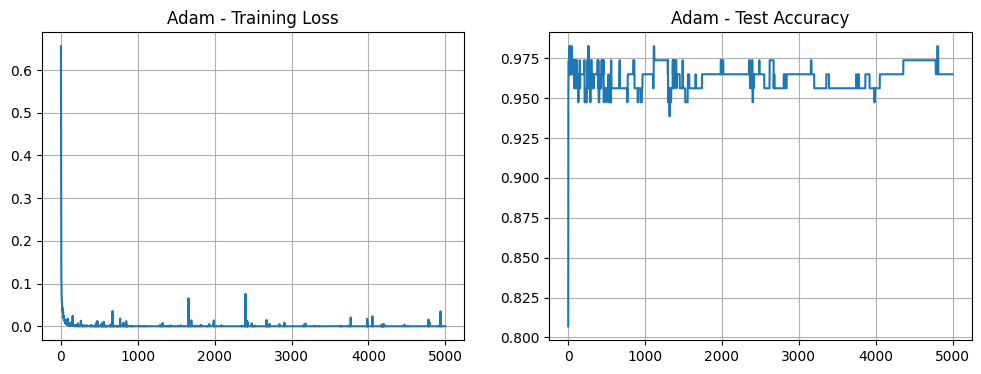

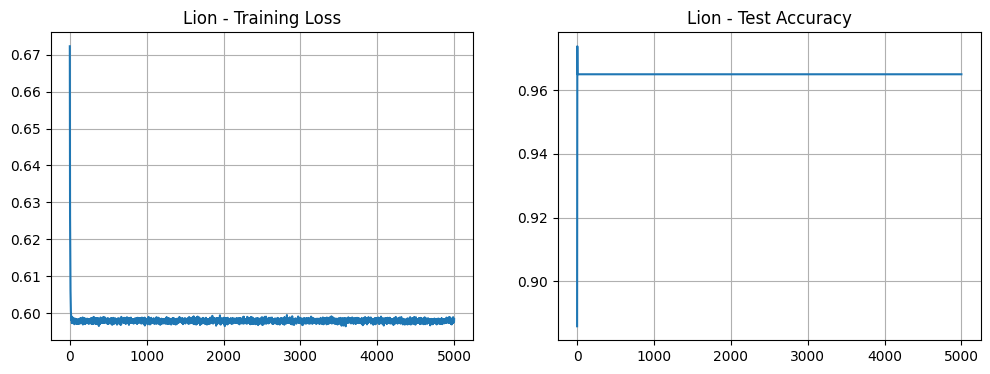

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ==== AdaBeliefXE Optimizer ====
class AdaBeliefXE(optim.Optimizer):
    def __init__(self, params, lr=1e-3, beta1_min=0.6, beta1_max=0.95,
                 beta2_min=0.9, beta2_max=0.999, eps=1e-8, weight_decay=0,
                 alpha=0.5, total_steps=10000):
        defaults = dict(lr=lr, beta1_min=beta1_min, beta1_max=beta1_max,
                        beta2_min=beta2_min, beta2_max=beta2_max, eps=eps,
                        weight_decay=weight_decay, alpha=alpha, total_steps=total_steps, step=0)
        super(AdaBeliefXE, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = closure() if closure is not None else None
        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError("AdaBeliefXE does not support sparse gradients")

                state = self.state[p]
                if len(state) == 0:
                    state["exp_avg"] = torch.zeros_like(p.data)
                    state["exp_avg_var"] = torch.zeros_like(p.data)

                exp_avg, exp_avg_var = state["exp_avg"], state["exp_avg_var"]
                group["step"] += 1
                step = group["step"]

                gamma = (step ** group["alpha"]) / (group["total_steps"] ** group["alpha"])
                beta1 = group["beta1_min"] + (group["beta1_max"] - group["beta1_min"]) * gamma
                beta2 = group["beta2_min"] + (group["beta2_max"] - group["beta2_min"]) * gamma

                if group["weight_decay"] != 0:
                    grad = grad.add(p.data, alpha=group["weight_decay"])

                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                grad_residual = grad - exp_avg
                exp_avg_var.mul_(beta2).addcmul_(grad_residual, grad_residual, value=1 - beta2)

                denom = exp_avg_var.sqrt().add_(group["eps"])
                step_size = group["lr"]
                p.data.addcdiv_(exp_avg, denom, value=-step_size)

        return loss

# ==== Lion Optimizer ====
class Lion(optim.Optimizer):
    def __init__(self, params, lr=1e-4, betas=(0.95, 0.98), weight_decay=1e-2):
        defaults = dict(lr=lr, betas=betas, weight_decay=weight_decay)
        super(Lion, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = closure() if closure is not None else None
        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]
                if len(state) == 0:
                    state["exp_avg"] = torch.zeros_like(p.data)
                exp_avg = state["exp_avg"]
                beta1, beta2 = group["betas"]
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                update = exp_avg.sign() * group["lr"]
                if group["weight_decay"] != 0:
                    update += group["weight_decay"] * p.data
                p.data.add_(-update)
        return loss

# ==== Dataset ====
class BreastCancerDataset(Dataset):
    def __init__(self):
        data = load_breast_cancer()
        X = StandardScaler().fit_transform(data.data)
        y = data.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.X_train = torch.tensor(X_train, dtype=torch.float32)
        self.y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
        self.X_test = torch.tensor(X_test, dtype=torch.float32)
        self.y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    def get_loaders(self, batch_size=32):
        train_ds = torch.utils.data.TensorDataset(self.X_train, self.y_train)
        test_ds = torch.utils.data.TensorDataset(self.X_test, self.y_test)
        return DataLoader(train_ds, batch_size=batch_size, shuffle=True), DataLoader(test_ds, batch_size=batch_size)

# ==== Model ====
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# ==== Training + Evaluation ====
def train(model, optimizer, train_loader, test_loader, epochs=5000):
    criterion = nn.BCEWithLogitsLoss()
    history = {"train_loss": [], "test_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
        history["train_loss"].append(total_loss / len(train_loader.dataset))

        # Evaluation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in test_loader:
                logits = model(x)
                probs = torch.sigmoid(logits)
                preds = (probs > 0.5).float()
                correct += (preds == y).sum().item()
                total += y.size(0)
        acc = correct / total
        history["test_acc"].append(acc)
        print(f"Epoch {epoch+1:02d}: Loss={history['train_loss'][-1]:.4f}, Test Acc={acc:.4f}")

    return history

# ==== Run Training ====
dataset = BreastCancerDataset()
train_loader, test_loader = dataset.get_loaders(batch_size=32)

optimizers = {
    "Adam": lambda p: optim.Adam(p, lr=1e-3),
    "Lion": lambda p: Lion(p, lr=3e-4),
    "AdaBeliefXE": lambda p: AdaBeliefXE(p, lr=1e-3, total_steps=50 * len(train_loader))
}

histories = {}
for name, opt_fn in optimizers.items():
    print(f"\n🔧 Training with {name}")
    model = MLP(input_dim=30)
    optimizer = opt_fn(model.parameters())
    history = train(model, optimizer, train_loader, test_loader, epochs=5000)
    histories[name] = history

# ==== Plot ====
for name, hist in histories.items():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist["train_loss"], label="Train Loss")
    plt.title(f"{name} - Training Loss")
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(hist["test_acc"], label="Test Accuracy")
    plt.title(f"{name} - Test Accuracy")
    plt.grid(True)
    plt.show()


Running Adamax...
Adamax Epoch 0: Loss = 0.1735, Accuracy = 0.3714
Adamax Epoch 1: Loss = 0.1652, Accuracy = 0.3714
Adamax Epoch 2: Loss = 0.1588, Accuracy = 0.3714
Adamax Epoch 3: Loss = 0.1538, Accuracy = 0.3714
Adamax Epoch 4: Loss = 0.1496, Accuracy = 0.3714
Adamax Epoch 5: Loss = 0.1460, Accuracy = 0.3714
Adamax Epoch 6: Loss = 0.1427, Accuracy = 0.3714
Adamax Epoch 7: Loss = 0.1398, Accuracy = 0.3758
Adamax Epoch 8: Loss = 0.1371, Accuracy = 0.3802
Adamax Epoch 9: Loss = 0.1346, Accuracy = 0.3956
Adamax Epoch 10: Loss = 0.1322, Accuracy = 0.4088
Adamax Epoch 11: Loss = 0.1300, Accuracy = 0.4132
Adamax Epoch 12: Loss = 0.1279, Accuracy = 0.4264
Adamax Epoch 13: Loss = 0.1259, Accuracy = 0.4484
Adamax Epoch 14: Loss = 0.1239, Accuracy = 0.4593
Adamax Epoch 15: Loss = 0.1221, Accuracy = 0.4637
Adamax Epoch 16: Loss = 0.1203, Accuracy = 0.4747
Adamax Epoch 17: Loss = 0.1185, Accuracy = 0.4791
Adamax Epoch 18: Loss = 0.1168, Accuracy = 0.4967
Adamax Epoch 19: Loss = 0.1152, Accuracy =

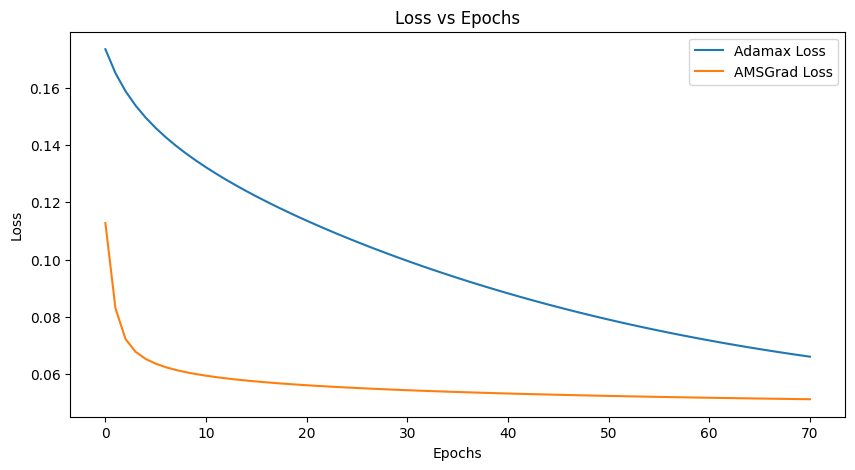

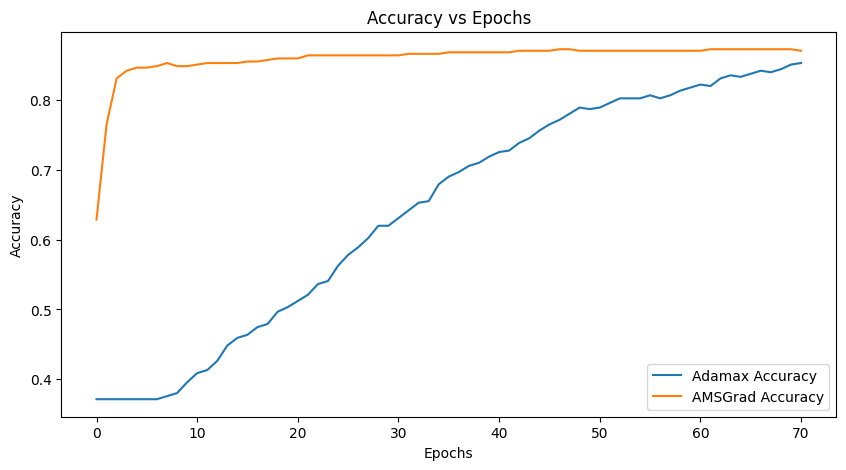

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Sigmoid function
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

# Mean Squared Error loss
def mse_loss(x, y, w, b):
    predictions = sigmoid(x, w, b)
    return 0.5 * np.mean((y - predictions) ** 2)

# Cross-Entropy loss
def cross_entropy_loss(x, y, w, b):
    predictions = sigmoid(x, w, b)
    return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

# Gradients for MSE
def grad_w_mse(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean((fx - y) * fx * (1 - fx) * x)

def grad_b_mse(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean((fx - y) * fx * (1 - fx))

# Gradients for Cross-Entropy
def grad_w_ce(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean((fx - y) * x)

def grad_b_ce(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean(fx - y)

# Prediction and accuracy
def predict(x, w, b):
    return (sigmoid(x, w, b) >= 0.5).astype(int)

def accuracy(x, y, w, b):
    return np.mean(predict(x, w, b) == y)

# Adamax optimizer
def adamax(x, y, epochs, batch_size, loss_fn, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w, b = np.random.randn(), np.random.randn()
    m_w, m_b = 0, 0  # First moment
    u_w, u_b = 0, 0  # Infinity norm
    losses, accuracies = [], []

    for epoch in range(epochs + 1):
        for i in range(0, len(x), batch_size):
            batch_x = x[i:i + batch_size]
            batch_y = y[i:i + batch_size]

            # Compute gradients
            if loss_fn == 'mse':
                dw = grad_w_mse(batch_x, batch_y, w, b)
                db = grad_b_mse(batch_x, batch_y, w, b)
            else:
                dw = grad_w_ce(batch_x, batch_y, w, b)
                db = grad_b_ce(batch_x, batch_y, w, b)

            # Update moments
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            u_w = max(beta2 * u_w, abs(dw))
            u_b = max(beta2 * u_b, abs(db))

            # Bias correction
            m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
            m_b_hat = m_b / (1 - beta1 ** (epoch + 1))

            # Update parameters
            w -= (lr / (u_w + epsilon)) * m_w_hat
            b -= (lr / (u_b + epsilon)) * m_b_hat

        # Track loss and accuracy
        loss = mse_loss(x, y, w, b) if loss_fn == 'mse' else cross_entropy_loss(x, y, w, b)
        acc = accuracy(x, y, w, b)
        losses.append(loss)
        accuracies.append(acc)
        print(f"Adamax Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    return losses, accuracies

# AMSGrad optimizer
def amsgrad(x, y, epochs, batch_size, loss_fn, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w, b = np.random.randn(), np.random.randn()
    m_w, m_b = 0, 0  # First moment
    v_w, v_b = 0, 0  # Second moment
    v_w_hat, v_b_hat = 0, 0  # Max second moment
    losses, accuracies = [], []

    for epoch in range(epochs + 1):
        for i in range(0, len(x), batch_size):
            batch_x = x[i:i + batch_size]
            batch_y = y[i:i + batch_size]

            # Compute gradients
            if loss_fn == 'mse':
                dw = grad_w_mse(batch_x, batch_y, w, b)
                db = grad_b_mse(batch_x, batch_y, w, b)
            else:
                dw = grad_w_ce(batch_x, batch_y, w, b)
                db = grad_b_ce(batch_x, batch_y, w, b)

            # Update moments
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * dw ** 2
            v_b = beta2 * v_b + (1 - beta2) * db ** 2
            v_w_hat = max(v_w_hat, v_w)
            v_b_hat = max(v_b_hat, v_b)

            # Bias correction
            m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
            m_b_hat = m_b / (1 - beta1 ** (epoch + 1))

            # Update parameters
            w -= (lr / (np.sqrt(v_w_hat) + epsilon)) * m_w_hat
            b -= (lr / (np.sqrt(v_b_hat) + epsilon)) * m_b_hat

        # Track loss and accuracy
        loss = mse_loss(x, y, w, b) if loss_fn == 'mse' else cross_entropy_loss(x, y, w, b)
        acc = accuracy(x, y, w, b)
        losses.append(loss)
        accuracies.append(acc)
        print(f"AMSGrad Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    return losses, accuracies

# Load and preprocess data
data = load_breast_cancer()
X = data.data[:, 0]  # Use 'mean radius' feature
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
X_test = scaler.transform(X_test.reshape(-1, 1)).flatten()

# Hyperparameters
epochs = 70
batch_size = 32
loss_fn = 'mse'

# Run optimizers
print("Running Adamax...")
start_time = time.time()
adamax_losses, adamax_accuracies = adamax(X_train, y_train, epochs, batch_size, loss_fn)
adamax_time = time.time() - start_time

print("\nRunning AMSGrad...")
start_time = time.time()
amsgrad_losses, amsgrad_accuracies = amsgrad(X_train, y_train, epochs, batch_size, loss_fn)
amsgrad_time = time.time() - start_time

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs + 1), adamax_losses, label='Adamax Loss')
plt.plot(range(epochs + 1), amsgrad_losses, label='AMSGrad Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.savefig('loss_comparison.png')

plt.figure(figsize=(10, 5))
plt.plot(range(epochs + 1), adamax_accuracies, label='Adamax Accuracy')
plt.plot(range(epochs + 1), amsgrad_accuracies, label='AMSGrad Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.savefig('accuracy_comparison.png')

# Print training times
print(f"\nAdamax Training Time: {adamax_time:.4f} seconds")
print(f"AMSGrad Training Time: {amsgrad_time:.4f} seconds")

Running Adam...
Adam Epoch 0: Loss = 0.1034, Accuracy = 0.6418
Adam Epoch 1: Loss = 0.1016, Accuracy = 0.6418
Adam Epoch 2: Loss = 0.1003, Accuracy = 0.6484
Adam Epoch 3: Loss = 0.0993, Accuracy = 0.6505
Adam Epoch 4: Loss = 0.0984, Accuracy = 0.6505
Adam Epoch 5: Loss = 0.0977, Accuracy = 0.6505
Adam Epoch 6: Loss = 0.0970, Accuracy = 0.6505
Adam Epoch 7: Loss = 0.0964, Accuracy = 0.6505
Adam Epoch 8: Loss = 0.0959, Accuracy = 0.6527
Adam Epoch 9: Loss = 0.0954, Accuracy = 0.6527
Adam Epoch 10: Loss = 0.0949, Accuracy = 0.6527
Adam Epoch 11: Loss = 0.0945, Accuracy = 0.6527
Adam Epoch 12: Loss = 0.0940, Accuracy = 0.6571
Adam Epoch 13: Loss = 0.0936, Accuracy = 0.6571
Adam Epoch 14: Loss = 0.0932, Accuracy = 0.6571
Adam Epoch 15: Loss = 0.0928, Accuracy = 0.6571
Adam Epoch 16: Loss = 0.0924, Accuracy = 0.6593
Adam Epoch 17: Loss = 0.0920, Accuracy = 0.6593
Adam Epoch 18: Loss = 0.0917, Accuracy = 0.6593
Adam Epoch 19: Loss = 0.0913, Accuracy = 0.6615
Adam Epoch 20: Loss = 0.0909, Accu

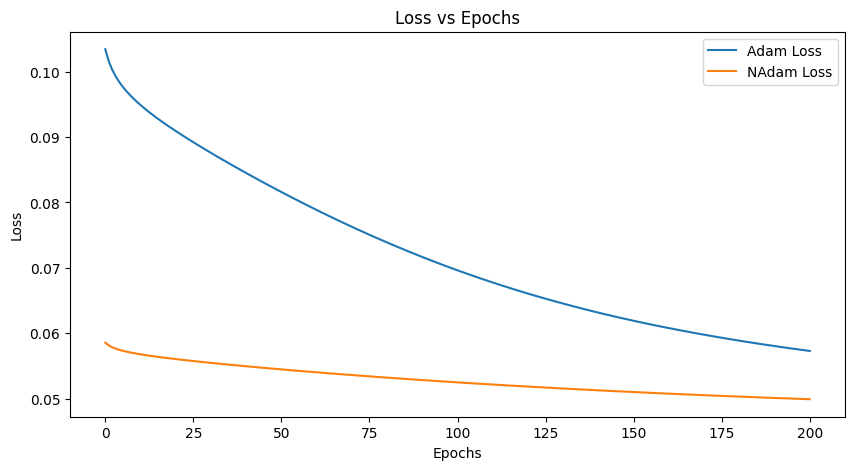

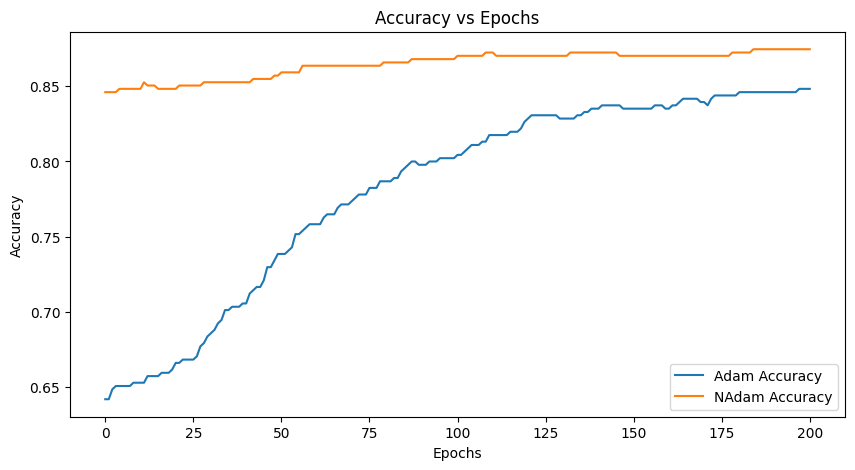

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Sigmoid function
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

# Mean Squared Error loss
def mse_loss(x, y, w, b):
    predictions = sigmoid(x, w, b)
    return 0.5 * np.mean((y - predictions) ** 2)

# Cross-Entropy loss
def cross_entropy_loss(x, y, w, b):
    predictions = sigmoid(x, w, b)
    return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

# Gradients for MSE
def grad_w_mse(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean((fx - y) * fx * (1 - fx) * x)

def grad_b_mse(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean((fx - y) * fx * (1 - fx))

# Gradients for Cross-Entropy
def grad_w_ce(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean((fx - y) * x)

def grad_b_ce(x, y, w, b):
    fx = sigmoid(x, w, b)
    return np.mean(fx - y)

# Prediction and accuracy
def predict(x, w, b):
    return (sigmoid(x, w, b) >= 0.5).astype(int)

def accuracy(x, y, w, b):
    return np.mean(predict(x, w, b) == y)

# Adam optimizer
def adam(x, y, epochs, batch_size, loss_fn, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w, b = np.random.randn(), np.random.randn()
    m_w, m_b = 0, 0  # First moment
    v_w, v_b = 0, 0  # Second moment
    losses, accuracies = [], []

    for epoch in range(epochs + 1):
        for i in range(0, len(x), batch_size):
            batch_x = x[i:i + batch_size]
            batch_y = y[i:i + batch_size]

            # Compute gradients
            if loss_fn == 'mse':
                dw = grad_w_mse(batch_x, batch_y, w, b)
                db = grad_b_mse(batch_x, batch_y, w, b)
            else:
                dw = grad_w_ce(batch_x, batch_y, w, b)
                db = grad_b_ce(batch_x, batch_y, w, b)

            # Update moments
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * dw ** 2
            v_b = beta2 * v_b + (1 - beta2) * db ** 2

            # Bias correction
            m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
            m_b_hat = m_b / (1 - beta1 ** (epoch + 1))
            v_w_hat = v_w / (1 - beta2 ** (epoch + 1))
            v_b_hat = v_b / (1 - beta2 ** (epoch + 1))

            # Update parameters
            w -= (lr / (np.sqrt(v_w_hat) + epsilon)) * m_w_hat
            b -= (lr / (np.sqrt(v_b_hat) + epsilon)) * m_b_hat

        # Track loss and accuracy
        loss = mse_loss(x, y, w, b) if loss_fn == 'mse' else cross_entropy_loss(x, y, w, b)
        acc = accuracy(x, y, w, b)
        losses.append(loss)
        accuracies.append(acc)
        print(f"Adam Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    return losses, accuracies

# NAdam optimizer
def nadam(x, y, epochs, batch_size, loss_fn, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w, b = np.random.randn(), np.random.randn()
    m_w, m_b = 0, 0  # First moment
    v_w, v_b = 0, 0  # Second moment
    losses, accuracies = [], []

    for epoch in range(epochs + 1):
        for i in range(0, len(x), batch_size):
            batch_x = x[i:i + batch_size]
            batch_y = y[i:i + batch_size]

            # Compute gradients
            if loss_fn == 'mse':
                dw = grad_w_mse(batch_x, batch_y, w, b)
                db = grad_b_mse(batch_x, batch_y, w, b)
            else:
                dw = grad_w_ce(batch_x, batch_y, w, b)
                db = grad_b_ce(batch_x, batch_y, w, b)

            # Update moments
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * dw ** 2
            v_b = beta2 * v_b + (1 - beta2) * db ** 2

            # Bias correction
            m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
            m_b_hat = m_b / (1 - beta1 ** (epoch + 1))
            v_w_hat = v_w / (1 - beta2 ** (epoch + 1))
            v_b_hat = v_b / (1 - beta2 ** (epoch + 1))

            # Nesterov lookahead
            m_w_lookahead = beta1 * m_w_hat + (1 - beta1) * dw / (1 - beta1 ** (epoch + 1))
            m_b_lookahead = beta1 * m_b_hat + (1 - beta1) * db / (1 - beta1 ** (epoch + 1))

            # Update parameters
            w -= (lr / (np.sqrt(v_w_hat) + epsilon)) * m_w_lookahead
            b -= (lr / (np.sqrt(v_b_hat) + epsilon)) * m_b_lookahead

        # Track loss and accuracy
        loss = mse_loss(x, y, w, b) if loss_fn == 'mse' else cross_entropy_loss(x, y, w, b)
        acc = accuracy(x, y, w, b)
        losses.append(loss)
        accuracies.append(acc)
        print(f"NAdam Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    return losses, accuracies

# Load and preprocess data
data = load_breast_cancer()
X = data.data[:, 0]  # Use 'mean radius' feature
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
X_test = scaler.transform(X_test.reshape(-1, 1)).flatten()

# Hyperparameters
epochs = 200
batch_size = 32
loss_fn = 'mse'

# Run optimizers
print("Running Adam...")
start_time = time.time()
adam_losses, adam_accuracies = adam(X_train, y_train, epochs, batch_size, loss_fn)
adam_time = time.time() - start_time

print("\nRunning NAdam...")
start_time = time.time()
nadam_losses, nadam_accuracies = nadam(X_train, y_train, epochs, batch_size, loss_fn)
nadam_time = time.time() - start_time

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs + 1), adam_losses, label='Adam Loss')
plt.plot(range(epochs + 1), nadam_losses, label='NAdam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.savefig('loss_comparison_adam_nadam.png')

plt.figure(figsize=(10, 5))
plt.plot(range(epochs + 1), adam_accuracies, label='Adam Accuracy')
plt.plot(range(epochs + 1), nadam_accuracies, label='NAdam Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.savefig('accuracy_comparison_adam_nadam.png')

# Print training times
print(f"\nAdam Training Time: {adam_time:.4f} seconds")
print(f"NAdam Training Time: {nadam_time:.4f} seconds")